In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [131]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
!ls /content/drive/MyDrive

 20JE0283_Chanchal_Rawate.pdf	  Chanchal_Rawate_SDE_resume.pdf
 Backend_project.gdoc		 'Colab Notebooks'
'ChanchalRawate_Resume (1).pdf'  'Document from Chanchal Rawate.pdf'
 ChanchalRawate_resume.pdf	 'Recusrion & Backtracking Notes Animated.pdf'
'Chanchal_Rawate.Resume .pdf'	 'Resume_Chanchal_Rawate .pdf'
 Chanchal_Rawate_Resume.pdf	  USAforeignworkerssalarydata.csv
 ChanchalRawate_Resume.pdf	  visa_project


In [133]:
!ls /content/drive/MyDrive/visa_Project

ls: cannot access '/content/drive/MyDrive/visa_Project': No such file or directory


In [134]:
!ls /content/drive/MyDrive/visa_project

data  README.md  src


In [135]:
import pandas as pd

path = "/content/drive/MyDrive/visa_project/data/processed/cleaned_visa_data.csv"  # 👈 inside quotes!
df = pd.read_csv(path)

print("✅ Data loaded successfully!")
print(df.head())
print("\nColumns:", df.columns)

✅ Data loaded successfully!
  CASE_STATUS      VISA_CLASS COUNTRY_OF_CITIZENSHIP  WORK_STATE  \
0      denied            H-1B                    NaN          IL   
1      denied       greencard                   IRAN  CALIFORNIA   
2      denied            H-1B                    NaN          CA   
3      denied            H-1B                    NaN          TX   
4      denied  E-3 Australian                    NaN          OR   

  APPLICATION_DATE DECISION_DATE  processing_time_days  
0       2014-03-14    2014-03-21                     7  
1       2015-03-19    2015-03-19                     0  
2       2013-09-13    2013-09-23                    10  
3       2014-03-28    2014-04-07                    10  
4       2014-09-16    2014-09-23                     7  

Columns: Index(['CASE_STATUS', 'VISA_CLASS', 'COUNTRY_OF_CITIZENSHIP', 'WORK_STATE',
       'APPLICATION_DATE', 'DECISION_DATE', 'processing_time_days'],
      dtype='object')


In [136]:
df["COUNTRY_OF_CITIZENSHIP"].isna().sum()

np.int64(156185)

In [137]:
df.shape

(167278, 7)

In [138]:
df["COUNTRY_OF_CITIZENSHIP"] = df["COUNTRY_OF_CITIZENSHIP"].fillna("Unknown")

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167278 entries, 0 to 167277
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CASE_STATUS             167278 non-null  object
 1   VISA_CLASS              167278 non-null  object
 2   COUNTRY_OF_CITIZENSHIP  167278 non-null  object
 3   WORK_STATE              167278 non-null  object
 4   APPLICATION_DATE        167278 non-null  object
 5   DECISION_DATE           167278 non-null  object
 6   processing_time_days    167278 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 8.9+ MB


In [140]:
date_cols = ["APPLICATION_DATE", "DECISION_DATE"]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167278 entries, 0 to 167277
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CASE_STATUS             167278 non-null  object        
 1   VISA_CLASS              167278 non-null  object        
 2   COUNTRY_OF_CITIZENSHIP  167278 non-null  object        
 3   WORK_STATE              167278 non-null  object        
 4   APPLICATION_DATE        167278 non-null  datetime64[ns]
 5   DECISION_DATE           167278 non-null  datetime64[ns]
 6   processing_time_days    167278 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 8.9+ MB


In [142]:
df.describe()

,APPLICATION_DATE,DECISION_DATE,processing_time_days
count,167278,167278,167278.000000
mean,2013-12-31 16:31:03.723860992,2014-02-25 07:21:21.234830848,55.618258
min,2008-07-16 00:00:00,2011-10-03 00:00:00,0.000000
25%,2013-04-16 00:00:00,2013-06-11 00:00:00,6.000000
50%,2014-03-11 00:00:00,2014-03-25 00:00:00,6.000000
75%,2014-10-10 00:00:00,2014-12-17 00:00:00,7.000000
max,2015-06-29 00:00:00,2015-06-30 00:00:00,2494.000000
std,NaN,NaN,164.812881


In [143]:
print(df["processing_time_days"].describe())

count    167278.000000
mean         55.618258
std         164.812881
min           0.000000
25%           6.000000
50%           6.000000
75%           7.000000
max        2494.000000
Name: processing_time_days, dtype: float64


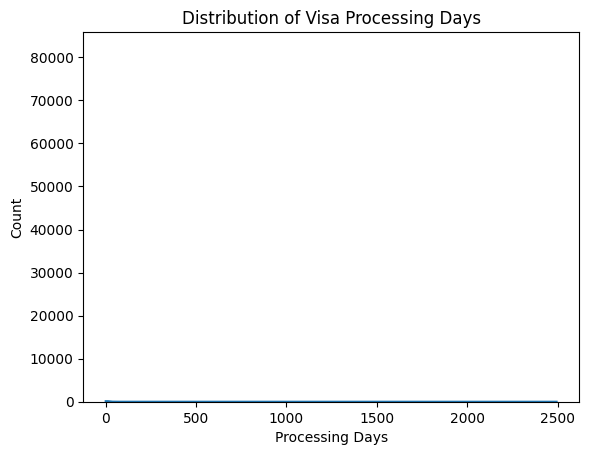

In [144]:
sns.histplot(df["processing_time_days"], kde=True)
plt.title("Distribution of Visa Processing Days")
plt.xlabel("Processing Days")
plt.ylabel("Count")
plt.show()

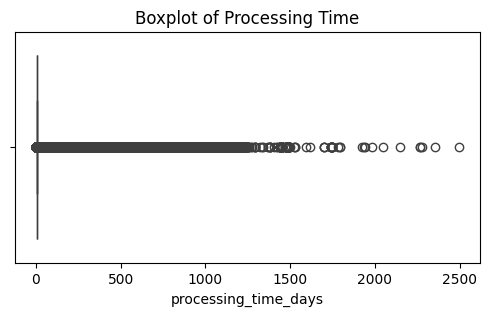

In [145]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df["processing_time_days"])
plt.title("Boxplot of Processing Time")
plt.show()

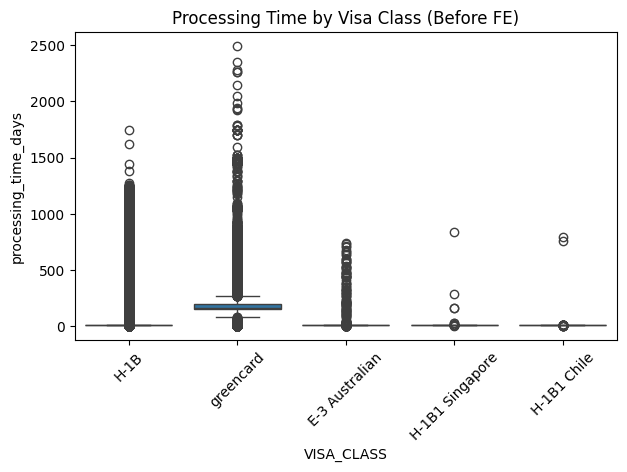

In [146]:
plt.figure(figsize=(7,4))
sns.boxplot(
    x="VISA_CLASS",
    y="processing_time_days",
    data=df
)
plt.xticks(rotation=45)
plt.title("Processing Time by Visa Class (Before FE)")
plt.show()

In [147]:
# Feature 1: Application Month
df["application_month"] = df["APPLICATION_DATE"].dt.month
print(df)

                CASE_STATUS      VISA_CLASS COUNTRY_OF_CITIZENSHIP  \
0                    denied            H-1B                Unknown   
1                    denied       greencard                   IRAN   
2                    denied            H-1B                Unknown   
3                    denied            H-1B                Unknown   
4                    denied  E-3 Australian                Unknown   
...                     ...             ...                    ...   
167273  certified-withdrawn            H-1B                Unknown   
167274               denied            H-1B                Unknown   
167275            certified            H-1B                Unknown   
167276               denied            H-1B                Unknown   
167277               denied            H-1B                Unknown   

        WORK_STATE APPLICATION_DATE DECISION_DATE  processing_time_days  \
0               IL       2014-03-14    2014-03-21                     7   
1       C

In [148]:
corr_matrix = df[["processing_time_days", "application_month"]].corr() # calculates the correlation values
print(corr_matrix)

                      processing_time_days  application_month
processing_time_days              1.000000           0.077677
application_month                 0.077677           1.000000


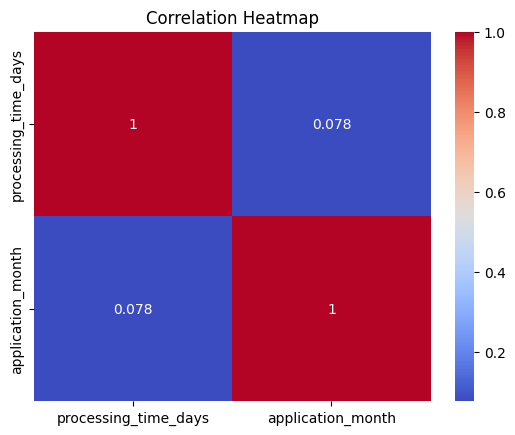

In [149]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm") # annot- shows nos inside the boxes, cmap- color scale for strnegth
plt.title("Correlation Heatmap")
plt.show()

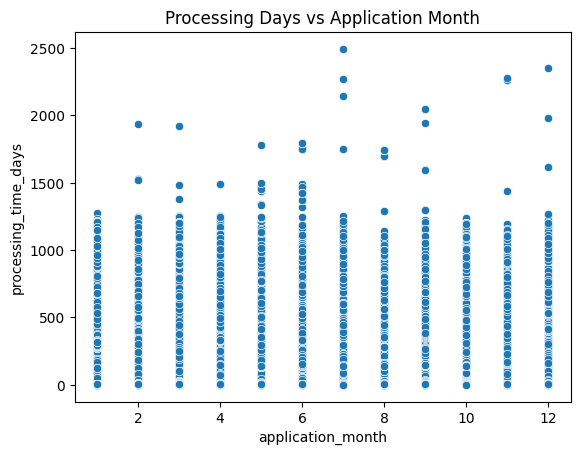

In [150]:
sns.scatterplot(
    x="application_month",
    y="processing_time_days",
    data=df
)
plt.title("Processing Days vs Application Month")
plt.show()

In [151]:

print(df[["APPLICATION_DATE", "application_month"]])

       APPLICATION_DATE  application_month
0            2014-03-14                  3
1            2015-03-19                  3
2            2013-09-13                  9
3            2014-03-28                  3
4            2014-09-16                  9
...                 ...                ...
167273       2012-08-28                  8
167274       2011-11-01                 11
167275       2011-11-09                 11
167276       2011-11-08                 11
167277       2011-10-24                 10

[167278 rows x 2 columns]


In [152]:
df["APPLICATION_DATE"].dt.year.value_counts()

,count
APPLICATION_DATE,
2014,67339
2013,49026
2015,31269
2012,9594
2011,8957
2010,981
2009,107
2008,5


In [155]:
df["application_year"] = df["APPLICATION_DATE"].dt.year

In [156]:
df["application_year"].head()

,application_year
0,2014
1,2015
2,2013
3,2014
4,2014


In [157]:
df.groupby("application_year")["processing_time_days"].mean()

,processing_time_days
application_year,
2008,2331.400000
2009,1001.794393
2010,913.425076
2011,194.607681
2012,197.451324
2013,45.098519
2014,33.329259
2015,6.267677


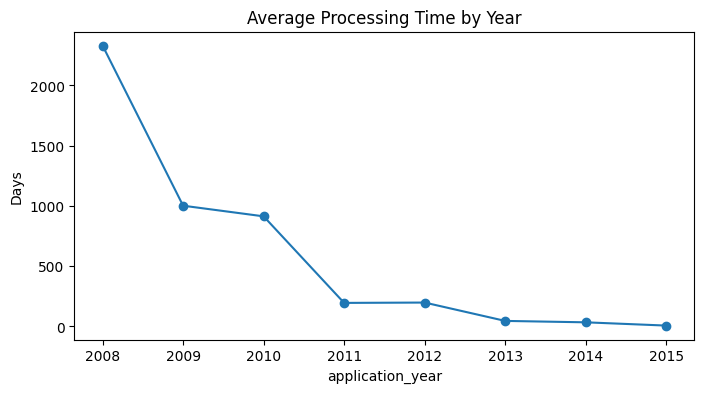

In [158]:
import matplotlib.pyplot as plt

yearly_avg = df.groupby("application_year")["processing_time_days"].mean()

plt.figure(figsize=(8,4))
yearly_avg.plot(marker='o')
plt.title("Average Processing Time by Year")
plt.ylabel("Days")
plt.show()

#This shows MASSIVE downward trend.
#If you keep raw year values:
#Model may overfit small years
#Noise from 5-row year (2008)

In [159]:
# Feature 2: years_since_start
df["years_since_start"] = (
    df["application_year"] - df["application_year"].min()
)
print(df)

                CASE_STATUS      VISA_CLASS COUNTRY_OF_CITIZENSHIP  \
0                    denied            H-1B                Unknown   
1                    denied       greencard                   IRAN   
2                    denied            H-1B                Unknown   
3                    denied            H-1B                Unknown   
4                    denied  E-3 Australian                Unknown   
...                     ...             ...                    ...   
167273  certified-withdrawn            H-1B                Unknown   
167274               denied            H-1B                Unknown   
167275            certified            H-1B                Unknown   
167276               denied            H-1B                Unknown   
167277               denied            H-1B                Unknown   

        WORK_STATE APPLICATION_DATE DECISION_DATE  processing_time_days  \
0               IL       2014-03-14    2014-03-21                     7   
1       C

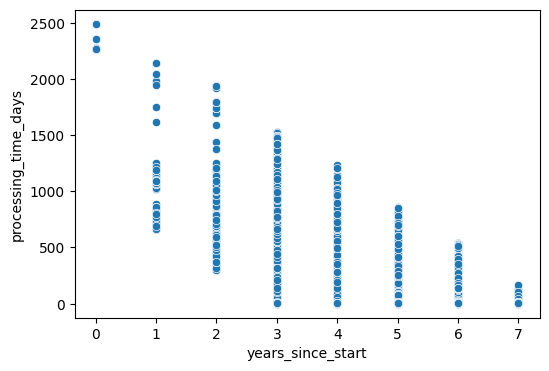

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.scatterplot(
    x="years_since_start",
    y="processing_time_days",
    data=df
)
plt.show()

In [161]:
# Feature 3 : Day of Week Feature
# 0 = Monday, 6 = Sunday
# Why this matters:
# Applications submitted on Friday may experience weekend delay.
df["application_dayofweek"] = df["APPLICATION_DATE"].dt.dayofweek
print(df)

                CASE_STATUS      VISA_CLASS COUNTRY_OF_CITIZENSHIP  \
0                    denied            H-1B                Unknown   
1                    denied       greencard                   IRAN   
2                    denied            H-1B                Unknown   
3                    denied            H-1B                Unknown   
4                    denied  E-3 Australian                Unknown   
...                     ...             ...                    ...   
167273  certified-withdrawn            H-1B                Unknown   
167274               denied            H-1B                Unknown   
167275            certified            H-1B                Unknown   
167276               denied            H-1B                Unknown   
167277               denied            H-1B                Unknown   

        WORK_STATE APPLICATION_DATE DECISION_DATE  processing_time_days  \
0               IL       2014-03-14    2014-03-21                     7   
1       C

In [162]:
# Feature 4: Season (Peak vs Off-Peak)
df["season"]= df["application_month"].apply(
    lambda x: "Peak" if x in [1,2,12] else "off-peak"
) # runs the logic row by row

print(df[["application_month", "season"]])

        application_month    season
0                       3  off-peak
1                       3  off-peak
2                       9  off-peak
3                       3  off-peak
4                       9  off-peak
...                   ...       ...
167273                  8  off-peak
167274                 11  off-peak
167275                 11  off-peak
167276                 11  off-peak
167277                 10  off-peak

[167278 rows x 2 columns]


In [163]:
# Feature 5: Visa Avg Processing Time
visa_avg = df.groupby("VISA_CLASS")["processing_time_days"].mean()
df["visa_avg_processing_time"] = df["VISA_CLASS"].map(visa_avg)
print(visa_avg)

VISA_CLASS
E-3 Australian      27.712132
H-1B                42.200593
H-1B1 Chile         16.496599
H-1B1 Singapore     15.885135
greencard          247.044713
Name: processing_time_days, dtype: float64


In [165]:
print(df)

                CASE_STATUS      VISA_CLASS COUNTRY_OF_CITIZENSHIP  \
0                    denied            H-1B                Unknown   
1                    denied       greencard                   IRAN   
2                    denied            H-1B                Unknown   
3                    denied            H-1B                Unknown   
4                    denied  E-3 Australian                Unknown   
...                     ...             ...                    ...   
167273  certified-withdrawn            H-1B                Unknown   
167274               denied            H-1B                Unknown   
167275            certified            H-1B                Unknown   
167276               denied            H-1B                Unknown   
167277               denied            H-1B                Unknown   

        WORK_STATE APPLICATION_DATE DECISION_DATE  processing_time_days  \
0               IL       2014-03-14    2014-03-21                     7   
1       C

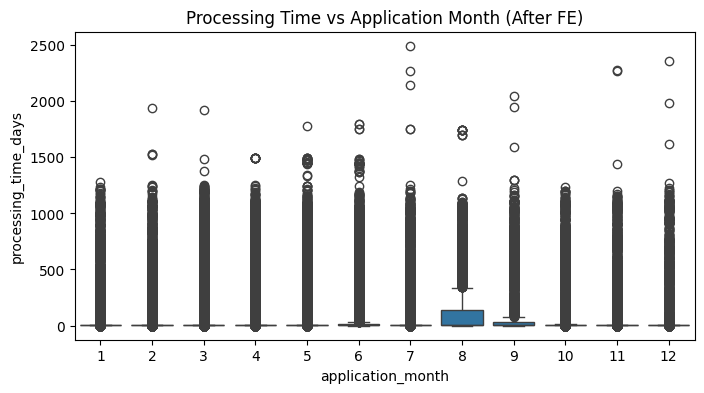

In [166]:
# Processing Time vs Application Month (After FE)
plt.figure(figsize=(8,4))
sns.boxplot(
    x="application_month",
    y="processing_time_days",
    data=df
)
plt.title("Processing Time vs Application Month (After FE)")
plt.show()

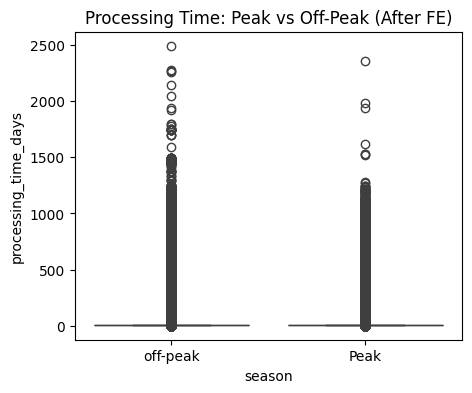

In [167]:
# Processing Time vs Season (After FE)
plt.figure(figsize=(5,4))
sns.boxplot(
    x="season",
    y="processing_time_days",
    data=df
)
plt.title("Processing Time: Peak vs Off-Peak (After FE)")
plt.show()

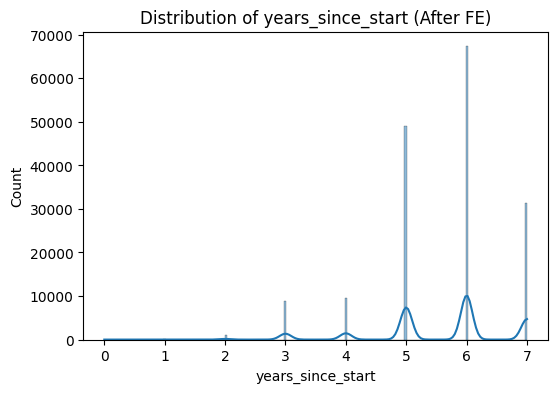

In [168]:


plt.figure(figsize=(6,4))
sns.histplot(df["years_since_start"], kde=True)
plt.title("Distribution of years_since_start (After FE)")
plt.show()

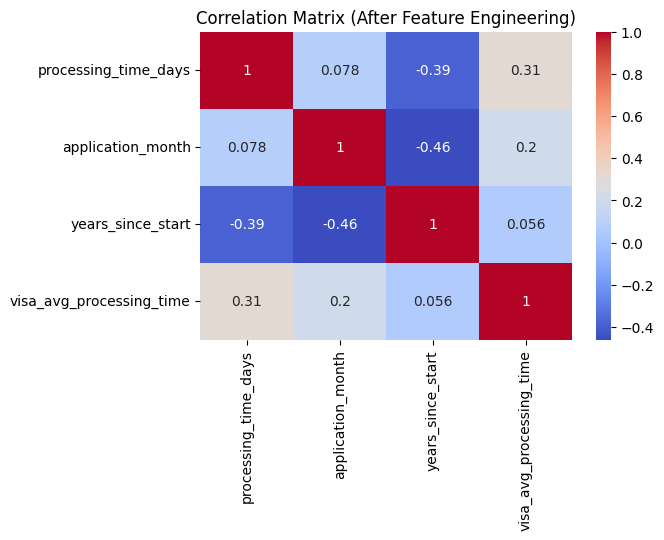

In [169]:
# Correlation Heatmap (After FE)

plt.figure(figsize=(6,4))
corr = df[
    [
        "processing_time_days",
        "application_month",
        "years_since_start",
        "visa_avg_processing_time"
    ]
].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (After Feature Engineering)")
plt.show()

In [170]:
#ENCODING (Categorical → Numerical)

In [ ]:
df_encoded = pd.get_dummies(
    df,
    columns=[
        "VISA_CLASS",
        "COUNTRY_OF_CITIZENSHIP",
        "WORK_STATE",
        "CASE_STATUS",
        "season"
    ],
    drop_first=True
)

In [171]:
# SCALING (Numerical Features)

In [172]:
scaler = StandardScaler()

scale_columns = [
    "application_month",
    "years_since_start",
    "visa_avg_processing_time"
]

df_encoded[scale_columns] = scaler.fit_transform(
    df_encoded[scale_columns]
)

In [173]:
df_encoded.shape

(167278, 260)

In [174]:
df_encoded.head()

,APPLICATION_DATE,DECISION_DATE,processing_time_days,application_month,country_avg_processing_time,visa_avg_processing_time,application_year,years_since_start,VISA_CLASS_H-1B,VISA_CLASS_H-1B1 Chile,...,WORK_STATE_WI,WORK_STATE_WISCONSIN,WORK_STATE_WV,WORK_STATE_WY,WORK_STATE_WYOMING,CASE_STATUS_certified-expired,CASE_STATUS_certified-withdrawn,CASE_STATUS_denied,CASE_STATUS_withdrawn,season_off-peak
0,2014-03-14,2014-03-21,7,-0.721841,NaN,-0.262862,2014,0.383196,True,False,...,False,False,False,False,False,False,False,True,False,True
1,2015-03-19,2015-03-19,0,-0.721841,177.681818,3.750182,2015,1.321636,False,False,...,False,False,False,False,False,False,False,True,False,True
2,2013-09-13,2013-09-23,10,1.048057,NaN,-0.262862,2013,-0.555245,True,False,...,False,False,False,False,False,False,False,True,False,True
3,2014-03-28,2014-04-07,10,-0.721841,NaN,-0.262862,2014,0.383196,True,False,...,False,False,False,False,False,False,False,True,False,True
4,2014-09-16,2014-09-23,7,1.048057,NaN,-0.546701,2014,0.383196,False,False,...,False,False,False,False,False,False,False,True,False,True


In [175]:
df_encoded.to_csv(
    "../content/drive/MyDrive/visa_project/data/processed/final_ml_ready_visa_data.csv",
    index=False
)

print("✅ Milestone 2 completed. Data is ML-ready.")

✅ Milestone 2 completed. Data is ML-ready.
